## let's start

### learn some data

In [71]:
#import libriries 

import pandas as pd 
import seaborn as sns
import numpy as np
import sklearn
import torch
import torch.nn as nn
import pickle
import torch.utils

from matplotlib import pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from torch.utils.data import DataLoader, TensorDataset
from torchsummary import summary
from tqdm import tqdm
from sklearn.model_selection import RandomizedSearchCV,train_test_split

In [72]:
# data path
train_p=r'E:\mphti\training\s4e5\train.csv'
test_p=r'E:\mphti\training\s4e5\test.csv'

# read data
train=pd.read_csv(train_p)
test=pd.read_csv(test_p)

In [73]:
train.head(5)

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [74]:
test.head(5)

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,...,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,...,4,3,2,6,4,6,8,4,5,5


### let's separate the id columns from the dataset, because they do not represent information that would affect the result

In [75]:
train_id=train['id']
train.drop(columns='id',axis=1,inplace=True)
test_id=test['id']
test.drop(columns='id',axis=1,inplace=True)

### drop N/A

In [76]:
print('TRAIN data\n')
print(f'{train.isna().sum()}\n\n')

print('TEST data\n')
print(test.isna().sum())

TRAIN data

MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64


TEST data

MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0


there are no duplicates, fortunately

### drop duplicate

In [77]:
train_duplicates_number = train[train.duplicated()]
test_duplicates_number = test[test.duplicated()]
                             
print(len(train_duplicates_number))
print(len(test_duplicates_number))

0
0


There are no duplicates either

In [78]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 21 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   MonsoonIntensity                 1117957 non-null  int64  
 1   TopographyDrainage               1117957 non-null  int64  
 2   RiverManagement                  1117957 non-null  int64  
 3   Deforestation                    1117957 non-null  int64  
 4   Urbanization                     1117957 non-null  int64  
 5   ClimateChange                    1117957 non-null  int64  
 6   DamsQuality                      1117957 non-null  int64  
 7   Siltation                        1117957 non-null  int64  
 8   AgriculturalPractices            1117957 non-null  int64  
 9   Encroachments                    1117957 non-null  int64  
 10  IneffectiveDisasterPreparedness  1117957 non-null  int64  
 11  DrainageSystems                  1117957 non-null 

all values have an integer form , it makes no sense to divide them into categorical and numeric

In [9]:
columns=list(train.columns)

### let's look at the distribution of data

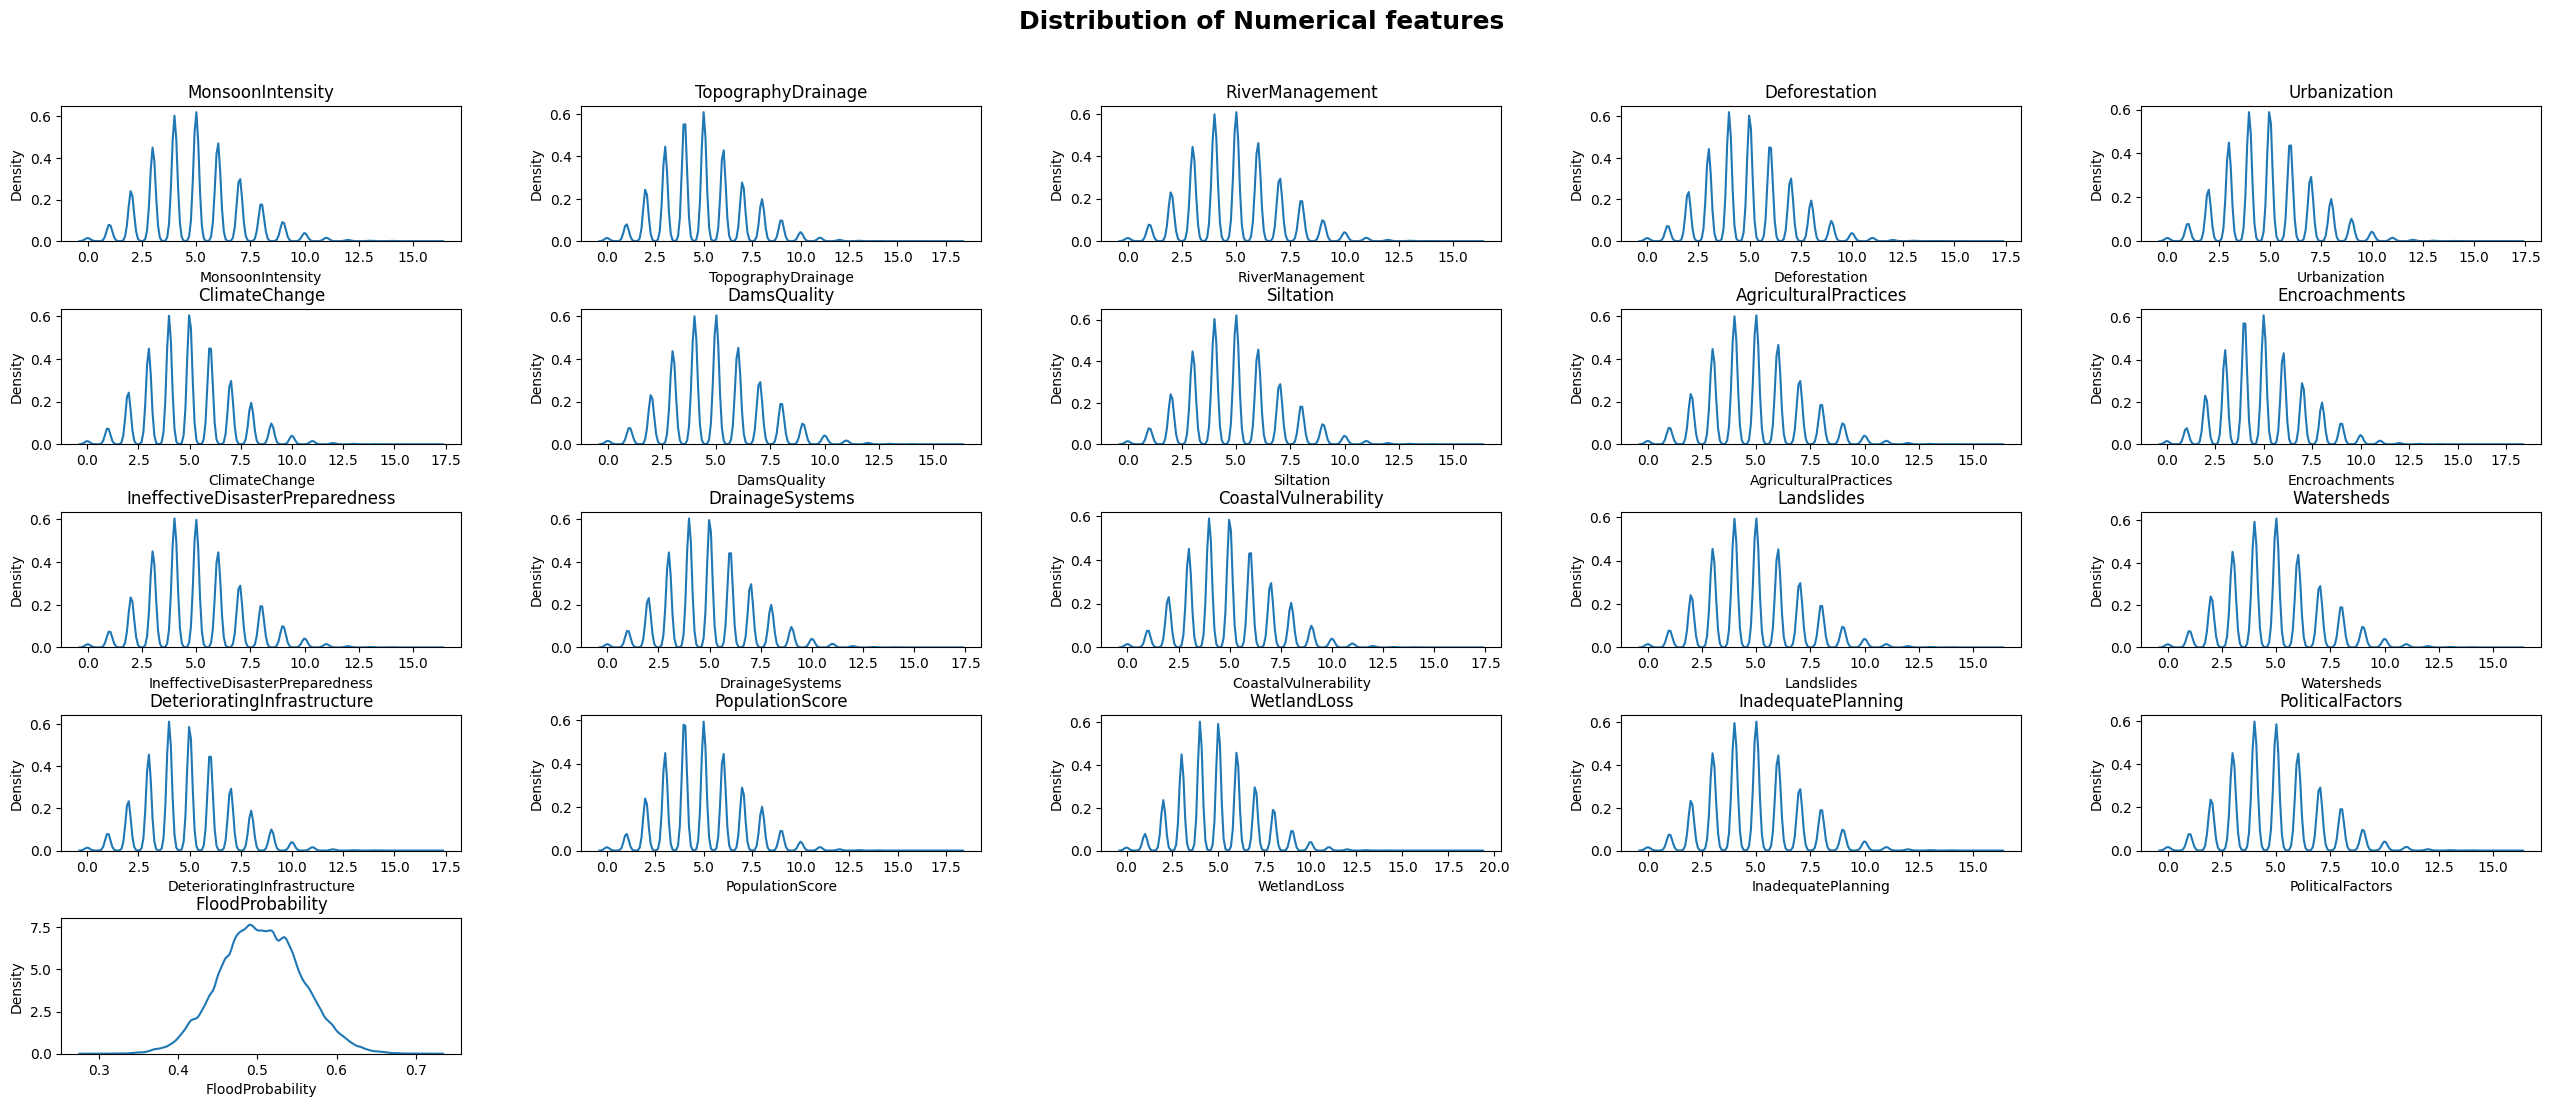

In [79]:
fig= plt.figure(figsize=[32, 12])
fig.suptitle('Distribution of Numerical features', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.9)
fig.subplots_adjust(hspace=0.5, wspace=0.3)
for i ,lab in enumerate(columns):

    ax = fig.add_subplot(5, 5, i+1)
    sns.kdeplot(data=train[columns], x=lab,ax=ax,warn_singular=False)
    
    ax.set_title(f'{lab}')
plt.show()

as you can see, the data is distributed according to Rayleigh's law , as I assume, the target feature is similar

### let's consider the importance of features based on two classifiers

In [19]:
y=train['FloodProbability']
train.drop(columns='FloodProbability',axis=1,inplace=True)
X=train


In [20]:
# scale data 
scale_data=StandardScaler()
X_feature=scale_data.fit_transform(X)

In [13]:
# ~8 min
best_xgb=XGBRegressor(
    objective='reg:squarederror',
    n_estimators=800,
    max_depth= 15,
    learning_rate= 0.001,
    subsample= 0.8,
    colsample_bytree= 0.9,
    colsample_bylevel= 0.8,  
    reg_lambda= 0.1,   # L2 regularization term on weights (xgb’s lambda).
    eval_metric= 'rmse',
    random_state= 42,
)

best_xgb.fit(X_feature,y)
importance_x= best_xgb.feature_importances_

In [15]:
# for CBR
# ~2 min
best_cbr=CatBoostRegressor(
    n_estimators=800,
    learning_rate=10**(-3),
    loss_function="RMSE",
    eval_metric="RMSE",
    random_seed=45
)

best_cbr.fit(X_feature,y)

importance_c=best_cbr.feature_importances_

0:	learn: 0.0510185	total: 201ms	remaining: 2m 40s
1:	learn: 0.0510109	total: 247ms	remaining: 1m 38s
2:	learn: 0.0510034	total: 293ms	remaining: 1m 17s
3:	learn: 0.0509958	total: 340ms	remaining: 1m 7s
4:	learn: 0.0509883	total: 388ms	remaining: 1m 1s
5:	learn: 0.0509808	total: 439ms	remaining: 58.1s
6:	learn: 0.0509732	total: 486ms	remaining: 55s
7:	learn: 0.0509657	total: 532ms	remaining: 52.6s
8:	learn: 0.0509582	total: 578ms	remaining: 50.8s
9:	learn: 0.0509507	total: 623ms	remaining: 49.2s
10:	learn: 0.0509433	total: 670ms	remaining: 48.1s
11:	learn: 0.0509358	total: 717ms	remaining: 47.1s
12:	learn: 0.0509283	total: 764ms	remaining: 46.2s
13:	learn: 0.0509208	total: 811ms	remaining: 45.5s
14:	learn: 0.0509134	total: 857ms	remaining: 44.9s
15:	learn: 0.0509060	total: 905ms	remaining: 44.3s
16:	learn: 0.0508986	total: 952ms	remaining: 43.9s
17:	learn: 0.0508912	total: 1s	remaining: 43.6s
18:	learn: 0.0508838	total: 1.05s	remaining: 43.2s
19:	learn: 0.0508764	total: 1.1s	remaining:

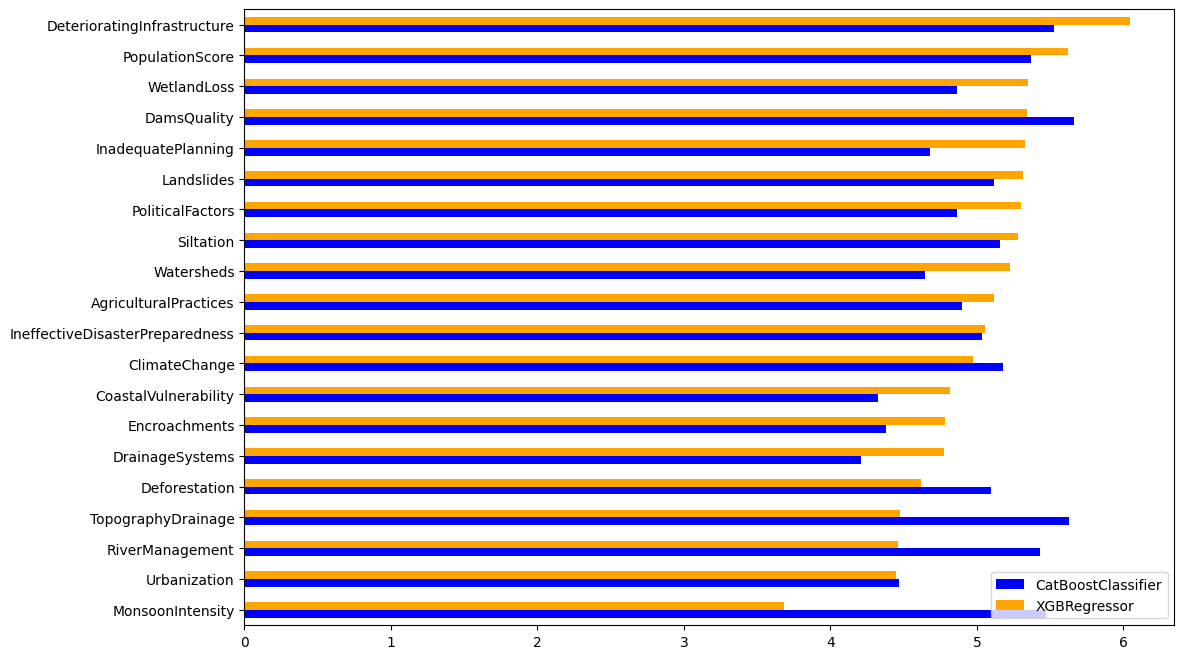

In [16]:
# compare output
d={
     'CatBoostClassifier':importance_c,
     'XGBRegressor': importance_x*100
 }
feature_importance=pd.DataFrame(data=d,index=X.columns).sort_values(ascending=True,by=['XGBRegressor','CatBoostClassifier'])   
feature_importance.plot(kind='barh', figsize=(12, 8), color=['blue','orange']); 

it can be seen that there are no signs that stand out strongly from the rest

### learning models

make meta model

In [21]:
X=train
X_scale=scale_data.fit_transform(X)


In [22]:
x_train,x_val,y_train,y_val= train_test_split(X_scale,y,test_size=0.3,random_state=55)

In [23]:
X_test=test
X_scale_ts=scale_data.fit_transform(X_test)

https://www.kaggle.com/code/arunklenin/ps4e5-autogluon-regression-baseline#3.-Additional-Features

### Catboost

In [15]:
catboost=CatBoostRegressor(
    loss_function='RMSE',
    eval_metric='RMSE',
    task_type="GPU"
)

parametrs={
    'n_estimators':range(800,1200,100),
    'learning_rate': np.linspace(0.001,0.01,10),
    'max_depth':range(7,15,2),
    'l2_leaf_reg':range(0,100,10)
}

random_search_cat=RandomizedSearchCV(
    estimator=catboost,
    param_distributions=parametrs,
    n_iter=5,
    n_jobs=1,
    cv=5,
    scoring='r2'
)

random_search_cat.fit(x_train, y_train)
print(f'{random_search_cat.best_params_,random_search_cat.score(x_train, y_train)}\n')

0:	learn: 0.0509961	total: 99.6ms	remaining: 1m 19s
1:	learn: 0.0509648	total: 179ms	remaining: 1m 11s
2:	learn: 0.0509337	total: 257ms	remaining: 1m 8s
3:	learn: 0.0509026	total: 328ms	remaining: 1m 5s
4:	learn: 0.0508714	total: 398ms	remaining: 1m 3s
5:	learn: 0.0508403	total: 466ms	remaining: 1m 1s
6:	learn: 0.0508093	total: 536ms	remaining: 1m
7:	learn: 0.0507782	total: 606ms	remaining: 59.9s
8:	learn: 0.0507474	total: 675ms	remaining: 59.3s
9:	learn: 0.0507165	total: 745ms	remaining: 58.8s
10:	learn: 0.0506857	total: 815ms	remaining: 58.4s
11:	learn: 0.0506551	total: 884ms	remaining: 58.1s
12:	learn: 0.0506244	total: 953ms	remaining: 57.7s
13:	learn: 0.0505938	total: 1.02s	remaining: 57.4s
14:	learn: 0.0505633	total: 1.09s	remaining: 57.1s
15:	learn: 0.0505330	total: 1.16s	remaining: 57.1s
16:	learn: 0.0505027	total: 1.23s	remaining: 56.9s
17:	learn: 0.0504725	total: 1.3s	remaining: 56.6s
18:	learn: 0.0504422	total: 1.37s	remaining: 56.4s
19:	learn: 0.0504119	total: 1.44s	remainin

In [16]:
train_cat=random_search_cat.predict(X_scale)
np.save('cat_m',train_cat)

In [17]:

# ({'max_depth': 11, 'learning_rate': 0.008, 'l2_leaf_reg': 20, 'iterations': 700}, 0.7583061304333912)
# save
with open('cat.pkl','wb') as f:
    pickle.dump(random_search_cat,f)
# load
with open('cat.pkl', 'rb') as f:
    rsc = pickle.load(f)

### XGBoost

https://kevinvecmanis.io/machine%20learning/hyperparameter%20tuning/dataviz/python/2019/05/11/XGBoost-Tuning-Visual-Guide.html

In [20]:
xbg=XGBRegressor(
    random_state= 42,
)

parametrs={
    'learning_rate':np.arange(0.01,0.1,10),
    'n_estimators': np.arange(800,1200,5),
    #'reg_alpha':np.arange(0.0001,1,0.1),
    #'reg_lambda':np.arange(0.0001,1,0.1),
    'subsample':np.arange(0.8,1,0.1)
}

random_search_xgb=RandomizedSearchCV(
    estimator=xbg,
    param_distributions=parametrs,
    n_iter=3,
    n_jobs=1,
    cv=4,
    scoring='r2'
)


In [ ]:

random_search_xgb.fit(x_train, y_train)
print(f'{random_search_xgb.best_params_,random_search_xgb.score(x_train, y_train)}\n')

In [18]:
# ({'subsample': 0.9, 'n_estimators': 1188, 'learning_rate': 0.01}, 0.8002575365238154)
# save
with open('xgb.pkl','wb') as f:
    pickle.dump(random_search_cat,f)
# load
with open('xgb.pkl', 'rb') as f:
    xgb = pickle.load(f)


In [ ]:
# save as numpy array
train_xgb=random_search_xgb.predict(X_scale)
np.save('xgb_m',train_xgb)

In [ ]:
# for test data
test_xgb=random_search_xgb.predict(X_scale_ts)
np.save('xgb_test',test_xgb)
test_cat=random_search_cat.predict(X_scale_ts)
np.save('cat_test',test_cat)

### Torch

work with data

In [24]:
class FloodData( torch.utils.data.Dataset ):

    def __init__(self,x,y):
        # data load
        self.x=torch.from_numpy(x)
        self.y=torch.from_numpy(y.to_numpy()).unsqueeze(1)
        self.n_samples=x.shape[0]
    def __getitem__(self,index):
        # dataset[]
        return self.x[index],self.y[index]
    def __len__ (self):
        return self.n_samples

In [25]:
# stack data from calaasifier and train dataset
xgb_pr = np.load('xgb_m.npy')
cat_pr = np.load('cat_m.npy')
# for test
xgb_ts = np.load('xgb_test.npy')
cat_ts = np.load('cat_test.npy')

In [26]:
X_train_extended = np.hstack((X_scale, xgb_pr.reshape(-1, 1),cat_pr.reshape(-1, 1)))
X_test_extended = np.hstack((X_scale_ts, xgb_ts.reshape(-1, 1), cat_ts.reshape(-1, 1)))

# Split data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(X_train_extended, y, test_size=0.20, random_state=42)

In [27]:
data=FloodData(x_train,y_train)
data_loader=DataLoader(dataset=data,batch_size=10000,shuffle=True)

data_val=FloodData(x_val,y_val)
val_loader=DataLoader(dataset=data_val,batch_size=10000,shuffle=False)

In [56]:
#The beauty is in the simpl
class simple_nn(nn.Module):
    def __init__ (self,input_size):
        super(simple_nn,self).__init__()

        self.seq1=nn.Sequential(
            nn.Linear(in_features=input_size,out_features=2048),
            nn.BatchNorm1d(2048),
            nn.ReLU(),
        )
        self.seq2=nn.Sequential(
            nn.Linear(in_features=2048,out_features=2048),
            nn.BatchNorm1d(2048),
            nn.ReLU()
        )
        self.seq3=nn.Sequential(
            nn.Linear(in_features=2048,out_features=1024),
            nn.BatchNorm1d(1024),
            nn.ReLU()
        )
        self.seq4=nn.Sequential(
            nn.Linear(in_features=1024,out_features=1024),
            nn.BatchNorm1d(1024),
            nn.ReLU()
        )
        self.seq5=nn.Sequential(
            nn.Linear(in_features=1024,out_features=512),
            nn.BatchNorm1d(512),
            nn.ReLU()
        )
        self.seq6=nn.Sequential(
            nn.Linear(in_features=512,out_features=256),
            nn.BatchNorm1d(256),
            nn.ReLU()
        )
        self.seq7=nn.Sequential(
            nn.Linear(in_features=256,out_features=128),
            nn.BatchNorm1d(128),
            nn.ReLU()
        )
        self.out=nn.Sequential(
            nn.Linear(in_features=128,out_features=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        
        x=self.seq1(x.float())
        x=self.seq2(x)
        x=self.seq3(x)
        x=self.seq4(x)
        x=self.seq5(x)
        x=self.seq6(x)
        x=self.seq7(x)
        
        x=self.out(x)
        
        return x

In [57]:
device='cuda' if torch.cuda.is_available() else 'cpu'
model=simple_nn(input_size=x_train[0].size).to(device)
summary(model)

Layer (type:depth-idx)                   Param #
├─Sequential: 1-1                        --
|    └─Linear: 2-1                       47,104
|    └─BatchNorm1d: 2-2                  4,096
|    └─ReLU: 2-3                         --
├─Sequential: 1-2                        --
|    └─Linear: 2-4                       4,196,352
|    └─BatchNorm1d: 2-5                  4,096
|    └─ReLU: 2-6                         --
├─Sequential: 1-3                        --
|    └─Linear: 2-7                       2,098,176
|    └─BatchNorm1d: 2-8                  2,048
|    └─ReLU: 2-9                         --
├─Sequential: 1-4                        --
|    └─Linear: 2-10                      1,049,600
|    └─BatchNorm1d: 2-11                 2,048
|    └─ReLU: 2-12                        --
├─Sequential: 1-5                        --
|    └─Linear: 2-13                      524,800
|    └─BatchNorm1d: 2-14                 1,024
|    └─ReLU: 2-15                        --
├─Sequential: 1-6         

Layer (type:depth-idx)                   Param #
├─Sequential: 1-1                        --
|    └─Linear: 2-1                       47,104
|    └─BatchNorm1d: 2-2                  4,096
|    └─ReLU: 2-3                         --
├─Sequential: 1-2                        --
|    └─Linear: 2-4                       4,196,352
|    └─BatchNorm1d: 2-5                  4,096
|    └─ReLU: 2-6                         --
├─Sequential: 1-3                        --
|    └─Linear: 2-7                       2,098,176
|    └─BatchNorm1d: 2-8                  2,048
|    └─ReLU: 2-9                         --
├─Sequential: 1-4                        --
|    └─Linear: 2-10                      1,049,600
|    └─BatchNorm1d: 2-11                 2,048
|    └─ReLU: 2-12                        --
├─Sequential: 1-5                        --
|    └─Linear: 2-13                      524,800
|    └─BatchNorm1d: 2-14                 1,024
|    └─ReLU: 2-15                        --
├─Sequential: 1-6         

In [58]:
x_train[0].size

22

### train NN

In [60]:
criterion=torch.nn.HuberLoss()
model=simple_nn(22).to(device)
optimizer=torch.optim.Adam(model.parameters(), lr=3*(10**(-3)),)
scheduler=torch.optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=0.1)

In [61]:
def fit_epoch(model,train_set,optimizer,sheduler,criterion):
    model.train()
    print ('Train')
    metric=[]
    tr_loss=0
    processed=0

    for x_bat,y_bat in train_set:
        # remove to cuda
        x_bat,y_bat=x_bat.to(device),y_bat.float()
        # train model for new weight
        outp=model(x_bat)
        # define the loss
        loss=criterion(y_bat.to(device),outp)
        # backward
        loss.backward()
        # next step for learning NN
        optimizer.step()
                # zero weight
        optimizer.zero_grad()
        # calculate loss and processed data
        tr_loss+=loss.item()*x_bat.size(0)
        processed+=x_bat.size(0)

        metric.append(r2_score(  y_bat.detach().numpy(),  outp.cpu().detach().numpy()  ))

    avg_loss=tr_loss/processed
    avg_r2=(sum(metric))/(len(metric))
    sheduler.step()

    print(f"Training Loss: {avg_loss:.4f}, Training R2: {avg_r2:.4f}")
    return  avg_loss,avg_r2

def eval_epoch(model,test_set,criterion):
    model.eval()

    metric=[]
    ts_loss=0
    processed=0
    for x_bat,y_bat in test_set:
        x_bat,y_bat=x_bat.to(device),y_bat.float()

        with torch.no_grad():
            outp=model(x_bat)
            loss=criterion(y_bat.to(device),outp)
            metric.append(r2_score(  y_bat.detach().numpy(),  outp.cpu().detach().numpy()  ))
        
        ts_loss+=loss.item()*x_bat.size(0)
        processed+=x_bat.size(0)

    avg_loss=ts_loss/processed
    avg_r2=(sum(metric))/(len(metric))
    print(f"Eval Loss: {avg_loss:.4f}, Eval R2: {avg_r2:.4f}")

    return avg_loss,avg_r2

def train (train_set,val_set,model,optimizer,criterion,epochs):
    best_val_loss=float('inf')
    best_model_state = None
    history=[]
    model=model.to(device)

    with tqdm(total=epochs) as pbar_outer:

        for epoch in range(epochs):
            
            avg_loss,avg_r2=fit_epoch(model,train_set,optimizer,scheduler,criterion)
            avg_loss_eval,avg_r2_eval = eval_epoch(model, val_set, criterion)

            history.append((avg_loss,avg_loss, avg_r2, avg_r2_eval))
            
            pbar_outer.update(1)

            if avg_loss_eval<best_val_loss:
                best_val_loss=avg_loss_eval
                best_model_state = model.state_dict()
                torch.save(model.state_dict(),'bestmodel.pt')

    return history

def prepare_submission(model_state, test_data_extended, test_ids, filename='submission.csv'):
    '''Predictions and Submission'''
    # load weight
    model.load_state_dict(model_state)
    # make torch tensor
    X_test_torch = torch.tensor(test_data_extended.astype(np.float32)).cuda()
    # predict
    predictions = model(X_test_torch)#.detach().numpy().squeeze()
    # predict tensor to np.array
    predictions=predictions.cpu().detach().numpy().squeeze()
    # make dataframe 
    submission_df = pd.DataFrame({
        'id': test_ids,
        'Exited': predictions
    })
    submission_df.to_csv(f'E:\mphti\\training\pl_gr\{filename}', index=False)
    print(f"Predictions saved to {filename}")

In [62]:
fit_epoch(model,data_loader,optimizer,scheduler,criterion)
eval_epoch(model,val_loader,criterion)


Train
Training Loss: 0.0005, Training R2: 0.5937
Eval Loss: 0.0002, Eval R2: 0.8543


(0.0001895218868108322, 0.8542596246077794)

In [63]:
# let's train the model
history=train(train_set=data_loader,
              val_set=val_loader,
              model=model,
              optimizer=optimizer,
              criterion=criterion,
              epochs=90
              )

  0%|          | 0/90 [00:00<?, ?it/s]

Train
Training Loss: 0.0002, Training R2: 0.8571


  1%|          | 1/90 [00:37<55:27, 37.38s/it]

Eval Loss: 0.0002, Eval R2: 0.8591
Train
Training Loss: 0.0002, Training R2: 0.8597


  2%|▏         | 2/90 [01:13<53:33, 36.52s/it]

Eval Loss: 0.0002, Eval R2: 0.8606
Train
Training Loss: 0.0002, Training R2: 0.8605


  3%|▎         | 3/90 [01:49<52:40, 36.33s/it]

Eval Loss: 0.0002, Eval R2: 0.8612
Train
Training Loss: 0.0002, Training R2: 0.8618


  4%|▍         | 4/90 [02:25<51:55, 36.23s/it]

Eval Loss: 0.0002, Eval R2: 0.8617
Train
Training Loss: 0.0002, Training R2: 0.8620


  6%|▌         | 5/90 [03:01<51:17, 36.21s/it]

Eval Loss: 0.0002, Eval R2: 0.8619
Train
Training Loss: 0.0002, Training R2: 0.8621


  7%|▋         | 6/90 [03:37<50:40, 36.19s/it]

Eval Loss: 0.0002, Eval R2: 0.8619
Train
Training Loss: 0.0002, Training R2: 0.8623


  8%|▊         | 7/90 [04:14<50:04, 36.20s/it]

Eval Loss: 0.0002, Eval R2: 0.8621
Train
Training Loss: 0.0002, Training R2: 0.8625


  9%|▉         | 8/90 [04:50<49:27, 36.19s/it]

Eval Loss: 0.0002, Eval R2: 0.8621
Train
Training Loss: 0.0002, Training R2: 0.8624


 10%|█         | 9/90 [05:26<48:53, 36.22s/it]

Eval Loss: 0.0002, Eval R2: 0.8621
Train
Training Loss: 0.0002, Training R2: 0.8625


 11%|█         | 10/90 [06:02<48:16, 36.21s/it]

Eval Loss: 0.0002, Eval R2: 0.8621
Train
Training Loss: 0.0002, Training R2: 0.8625


 12%|█▏        | 11/90 [06:38<47:41, 36.22s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8624


 13%|█▎        | 12/90 [07:15<47:24, 36.46s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8624


 14%|█▍        | 13/90 [07:51<46:18, 36.09s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8625


 16%|█▌        | 14/90 [08:26<45:21, 35.81s/it]

Eval Loss: 0.0002, Eval R2: 0.8621
Train
Training Loss: 0.0002, Training R2: 0.8625


 17%|█▋        | 15/90 [09:01<44:31, 35.62s/it]

Eval Loss: 0.0002, Eval R2: 0.8621
Train
Training Loss: 0.0002, Training R2: 0.8625


 18%|█▊        | 16/90 [09:36<43:44, 35.47s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8625


 19%|█▉        | 17/90 [10:11<43:05, 35.41s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8625


 20%|██        | 18/90 [10:47<42:24, 35.34s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8626


 21%|██        | 19/90 [11:23<42:08, 35.61s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8625


 22%|██▏       | 20/90 [11:58<41:23, 35.48s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8625


 23%|██▎       | 21/90 [12:33<40:43, 35.41s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8626


 24%|██▍       | 22/90 [13:08<40:01, 35.32s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8625


 26%|██▌       | 23/90 [13:44<39:24, 35.29s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8625


 27%|██▋       | 24/90 [14:19<38:46, 35.25s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8626


 28%|██▊       | 25/90 [14:54<38:11, 35.25s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8626


 29%|██▉       | 26/90 [15:29<37:34, 35.23s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8625


 30%|███       | 27/90 [16:04<37:00, 35.24s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8625


 31%|███       | 28/90 [16:40<36:24, 35.23s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8625


 32%|███▏      | 29/90 [17:15<35:48, 35.23s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8626


 33%|███▎      | 30/90 [17:51<35:30, 35.50s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8626


 34%|███▍      | 31/90 [18:26<34:49, 35.42s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8624


 36%|███▌      | 32/90 [19:01<34:09, 35.34s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8625


 37%|███▋      | 33/90 [19:37<33:33, 35.32s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8625


 38%|███▊      | 34/90 [20:12<32:55, 35.27s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8625


 39%|███▉      | 35/90 [20:47<32:19, 35.26s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8625


 40%|████      | 36/90 [21:23<31:57, 35.50s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8625


 41%|████      | 37/90 [21:58<31:18, 35.44s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8625


 42%|████▏     | 38/90 [22:34<30:38, 35.35s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8625


 43%|████▎     | 39/90 [23:09<30:00, 35.31s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8625


 44%|████▍     | 40/90 [23:44<29:23, 35.27s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8625


 46%|████▌     | 41/90 [24:19<28:47, 35.25s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8625


 47%|████▋     | 42/90 [24:56<28:36, 35.75s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8625


 48%|████▊     | 43/90 [25:32<28:05, 35.86s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8624


 49%|████▉     | 44/90 [26:07<27:18, 35.62s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8625


 50%|█████     | 45/90 [26:44<27:03, 36.09s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8625


 51%|█████     | 46/90 [27:21<26:37, 36.30s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8625


 52%|█████▏    | 47/90 [27:57<25:51, 36.09s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8626


 53%|█████▎    | 48/90 [28:32<25:04, 35.81s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8625


 54%|█████▍    | 49/90 [29:07<24:18, 35.58s/it]

Eval Loss: 0.0002, Eval R2: 0.8621
Train
Training Loss: 0.0002, Training R2: 0.8625


 56%|█████▌    | 50/90 [29:41<23:23, 35.10s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8625


 57%|█████▋    | 51/90 [30:16<22:51, 35.17s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8625


 58%|█████▊    | 52/90 [30:50<22:03, 34.83s/it]

Eval Loss: 0.0002, Eval R2: 0.8621
Train
Training Loss: 0.0002, Training R2: 0.8625


 59%|█████▉    | 53/90 [31:26<21:36, 35.05s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8625


 60%|██████    | 54/90 [32:01<21:02, 35.07s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8625


 61%|██████    | 55/90 [32:36<20:28, 35.10s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8625


 62%|██████▏   | 56/90 [33:11<19:53, 35.12s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8626


 63%|██████▎   | 57/90 [33:47<19:19, 35.13s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8625


 64%|██████▍   | 58/90 [34:23<18:52, 35.40s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8625


 66%|██████▌   | 59/90 [34:58<18:15, 35.33s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8625


 67%|██████▋   | 60/90 [35:34<17:51, 35.72s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8624


 68%|██████▊   | 61/90 [36:10<17:11, 35.56s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8626


 69%|██████▉   | 62/90 [36:44<16:26, 35.22s/it]

Eval Loss: 0.0002, Eval R2: 0.8621
Train
Training Loss: 0.0002, Training R2: 0.8626


 70%|███████   | 63/90 [37:17<15:36, 34.68s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8625


 71%|███████   | 64/90 [37:50<14:47, 34.12s/it]

Eval Loss: 0.0002, Eval R2: 0.8621
Train
Training Loss: 0.0002, Training R2: 0.8626


 72%|███████▏  | 65/90 [38:23<14:03, 33.76s/it]

Eval Loss: 0.0002, Eval R2: 0.8621
Train
Training Loss: 0.0002, Training R2: 0.8625


 73%|███████▎  | 66/90 [38:56<13:23, 33.47s/it]

Eval Loss: 0.0002, Eval R2: 0.8621
Train
Training Loss: 0.0002, Training R2: 0.8625


 74%|███████▍  | 67/90 [39:29<12:46, 33.31s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8626


 76%|███████▌  | 68/90 [40:02<12:09, 33.14s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8625


 77%|███████▋  | 69/90 [40:34<11:34, 33.06s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8625


 78%|███████▊  | 70/90 [41:09<11:07, 33.39s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8625


 79%|███████▉  | 71/90 [41:45<10:50, 34.25s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8625


 80%|████████  | 72/90 [42:18<10:12, 34.02s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8626


 81%|████████  | 73/90 [42:51<09:32, 33.67s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8626


 82%|████████▏ | 74/90 [43:26<09:03, 33.94s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8626


 83%|████████▎ | 75/90 [44:01<08:34, 34.33s/it]

Eval Loss: 0.0002, Eval R2: 0.8621
Train
Training Loss: 0.0002, Training R2: 0.8625


 84%|████████▍ | 76/90 [44:38<08:12, 35.21s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8626


 86%|████████▌ | 77/90 [45:13<07:36, 35.13s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8626


 87%|████████▋ | 78/90 [45:47<06:55, 34.59s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8626


 88%|████████▊ | 79/90 [46:22<06:24, 34.93s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8625


 89%|████████▉ | 80/90 [46:57<05:49, 34.97s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8625


 90%|█████████ | 81/90 [47:33<05:15, 35.05s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8625


 91%|█████████ | 82/90 [48:08<04:40, 35.08s/it]

Eval Loss: 0.0002, Eval R2: 0.8621
Train
Training Loss: 0.0002, Training R2: 0.8626


 92%|█████████▏| 83/90 [48:43<04:05, 35.11s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8626


 93%|█████████▎| 84/90 [49:17<03:29, 34.87s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8626


 94%|█████████▍| 85/90 [49:50<02:51, 34.35s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8625


 96%|█████████▌| 86/90 [50:23<02:15, 33.93s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8625


 97%|█████████▋| 87/90 [50:56<01:40, 33.65s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8625


 98%|█████████▊| 88/90 [51:29<01:06, 33.40s/it]

Eval Loss: 0.0002, Eval R2: 0.8621
Train
Training Loss: 0.0002, Training R2: 0.8625


 99%|█████████▉| 89/90 [52:03<00:33, 33.62s/it]

Eval Loss: 0.0002, Eval R2: 0.8622
Train
Training Loss: 0.0002, Training R2: 0.8625


100%|██████████| 90/90 [52:38<00:00, 35.10s/it]

Eval Loss: 0.0002, Eval R2: 0.8622


In [64]:
loss=[history[i][3] for i in range(0,len(history)) ]
import statistics 
print (f"Mean accuracy {statistics.mean(loss)}")

Mean accuracy 0.8620960994234959


In [65]:
dataset_test = FloodData(X_test_extended, pd.Series([np.nan]*len(X_test), index=X_test.index))
dataset_test_loader = torch.utils.data.DataLoader(dataset_test,
                                                batch_size=10000,
                                                generator=torch.Generator(device='cpu')
                                            )

In [66]:
def prepare_submission(path, test_data_extended, test_ids):
    '''Predictions and Submission'''
    # load weight
    model.load_state_dict(torch.load(path))

    Y_test_pred = []
    for inputs, outputs in tqdm(test_data_extended):
        preds = model(inputs.cuda())
        preds_np = preds.cpu().detach().numpy()
        Y_test_pred += list(preds_np)


    # make dataframe 
    submission_df = pd.DataFrame({
        'id': test_ids,
        'FloodProbability': Y_test_pred
    })
    return submission_df

In [67]:
sub_df=prepare_submission(r'E:\mphti\training\s4e5\bestmodel.pt',dataset_test_loader,test_id)

100%|██████████| 75/75 [00:12<00:00,  5.81it/s]


In [68]:
sub_df['FloodProbability'] = sub_df['FloodProbability'].map(lambda x: x[0])

In [69]:
sub_df.to_csv(f'E:\mphti\\training\s4e5\submission.csv', index=False)